In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import yaml

In [3]:
import os

In [4]:
# DIR = "../multirun/2020-06-07/20-51-14/"
DIR = "/home/ira/code/projects/rl_trickery/multirun/2020-06-08/07-43-31/"
# DIR = "/home/ira/code/projects/rl_trickery/saved_experiments/crnn_num_steps_20-51-14/"

In [5]:
runs = sorted(os.listdir(DIR))
runs

['agent.network.recurse_depth=1_0', 'agent.network.recurse_depth=2_0']

In [6]:
dfs = {}
for run in runs:
    f_eval = DIR + run + "/eval.csv"
    f_train = DIR + run + "/train.csv"    
    df_run = pd.read_csv(f_train)
    dfs[run] = df_run

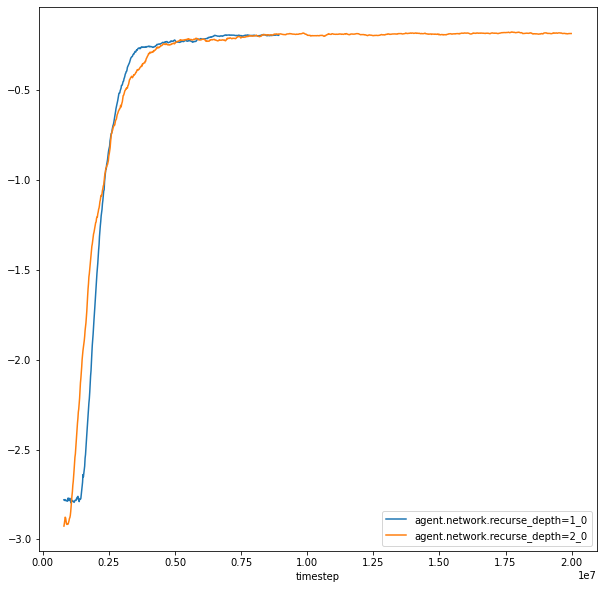

In [7]:
ax = None
target_var = "episode_reward"
# target_var = "loss_entropy"
# target_var = "fps"
# target_var = "episode"
# target_var = "value"
for key, df in dfs.items():
    df = df.set_index("timestep")[target_var]
    df = df.rolling(50).mean()
    ax = df.reset_index().plot(x="timestep", y=target_var, label=key, ax=ax, figsize=(10,10))